In [158]:
# Importing the necessaary classes for string processing from nltk
import nltk 
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import conlltags2tree, tree2conlltags
nltk.download('averaged_perceptron_tagger')

from textblob import TextBlob
import spacy 
import en_core_web_md
from spacy import displacy
import en_core_web_sm

# Importing various string processing and iteration packages
import re

from collections import Counter, OrderedDict
from itertools import islice
import json
import os
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.setrecursionlimit(5000)

# Importing pandas and setting pandas default options
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Silencing warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sachi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [100]:
# Opening the file with the json class
with open('tweets.json') as jfile:
    d = json.load(jfile)
    

len(d)

43347

In [101]:
d.keys()

dict_keys(['1374140386071961602', '1374032432173842437', '1373902876553048065', '1373656782367813635', '1372941634334232586', '1372927482278539265', '1372911723305394179', '1372888121159868423', '1372866915081797632', '1372825553837944834', '1372788676191608837', '1372662881230188555', '1372583112723533827', '1372558560543047693', '1372549029767299076', '1372529109805510658', '1372528985691746305', '1372528101335265284', '1372526440680333314', '1372519291635998731', '1372515771205742604', '1372510731795492867', '1372490442911141897', '1372475756845137920', '1372473228938084360', '1372473109287215104', '1372447809467777025', '1372240588527968259', '1371884004950089733', '1371398643236925441', '1370026180603117580', '1367801199638896640', '1367440609896710145', '1366770231289536522', '1365755830574977026', '1365449441398915076', '1364491860954259459', '1364304315838582793', '1364302784938475521', '1364189928133976069', '1364169662267682820', '1364019275279654912', '1363455819493310464', 

In [102]:
# Reading the dataset into a dataframe object to make it easier for string processing
tweets_df = pd.DataFrame.from_dict(d, orient = 'index')
tweets_df.head(20)

,tweet_author,tweet_text
1374140386071961602,Hematopoiesis News,"⚕️ Scientists conducted a Phase II study of acalabrutinib in patients with relapsed/refractory #CLL who were ibrutinib-intolerant, and found an overall response rate of 73%. \nhttps://t.co/eJ6m4QpC5P https://t.co/kuZz6ZO47r"
1374032432173842437,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) trial that is still in recruitment phase will study how well venetoclax and acalabrutinib works in MCL patients who either relapsed or non-respondent to the initial therapy.\n\nhttps://t.co/gg0G9At23N
1373902876553048065,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL https://t.co/Vb5lPDoGrA
1373656782367813635,Toby Eyre,#acalabrutinib is a valuable option in pts intolerant to #ibrutinib. Further valuable data to help decision making in #CLL \n\nEarly View | Haematologica https://t.co/Z2kCLZaX0D
1372941634334232586,Lymphoma Hub,NICE has recommended the use of acalabrutinib for patients with treatment-naïve chronic lymphocytic leukemia. Find out more here https://t.co/6OuJptLCIN #lymsm #lymphoma
1372927482278539265,David Ledger,NICE backs AstraZeneca’s Calquence for CLL https://t.co/JOPNLNID5R https://t.co/9pwY4NKP4s
1372911723305394179,N Wales Cancer Forum,This is England for now - these decisions usually come to Wales too. \nMore info\n\n https://t.co/SR5TU0ZSHH https://t.co/OFdwEdlav6
1372888121159868423,European Pharmaceutical Review,"AstraZeneca’s Calquence (acalabrutinib), a chemotherapy-free monotherapy, will be offered to patients with chronic lymphocytic #leukaemia.\n#oncology #drugapprovals #pharma #healthnews\nFind out more here: https://t.co/qYUft2Cn8b https://t.co/Sxve6NGGX3"
1372866915081797632,Graham Collins,Superstar @tobyeyre82 responding to the excellent news of NICE approval of acalabrutinib in frontline CLL for FCR / BR unsuitable patients. https://t.co/lACvpOtrWx
1372825553837944834,CLL Ireland,CLL patients all know the drug Ibrutinib and yesterday in the UK Acalabrutinib was approved and now a new drug Pirtobrutinib is making a big impact for relapsed patients in recent #clinicaltrials\n@cancertrials_ie @CllSociety @LAL_NI @BloodCancerIRL\nhttps://t.co/murr3KPhsZ


In [103]:
# Slicing the tweets write a preprocessing function for the tweet
tweets_df[100:250]

,tweet_author,tweet_text
1353836577642962944,OncLive.com,Acalabrutinib Approved in Japan for Relapsed/Refractory CLL #leusm https://t.co/3KLyHko5DQ
1353834280921800705,FiercePharma,AstraZeneca touts Calquence safety win against Imbruvica in leukemia trial showdown https://t.co/kBg8DCFFmB
1353830533491544064,Benlazar S.M Aminé,Outcomes of relapsed mantle cell #lymphoma patients after discontinuing acalabrutinib - Jain - - American Journal of Hematology - Wiley Online Library\nhttps://t.co/O0qbBGmL3R https://t.co/baT6qqNCKg
1353828627717124097,WebWire,Calquence approved in Japan for the treatment of relapsed or refractory chronic lymphocytic leukaemia https://t.co/PmCBCUocGS
1353814607492751360,Tecnomedicina,Calquence ha raggiunto l’endpoint primario di efficacia nello studio testa a testa contro ibrutinib nella leucemia linfocitica cronica https://t.co/Bsv3LYniYl
1353798006924046336,HemOnc Today,🆕 Topline results of randomized phase 3 ELEVATE-RR trial show that acalabrutinib exhibits comparable efficacy and superior safety when compared with ibrutinib for chronic lymphocytic leukemia https://t.co/kuiIbqSlOz #CLL @AstraZeneca https://t.co/r26qeEFL8o
1353781577524924416,BrainSights iOS App,CALQUENCE Met Primary Efficacy Endpoint in Head-to-Head Trial Against ibrutinib in Chronic Lymphocytic Leukemia - Neuro Central via BrainSights for iOS https://t.co/sQAr3EAIyZ
1353780477354594305,Dr Timos Papagatsias,AstraZeneca touts Calquence safety win against Imbruvica in leukemia trial showdown https://t.co/8kgb7wPFov #strategy #competitiveintelligence #marketing #pharma #productmarketing #pharmaceutical #healthcare #biotech
1353778216037732354,NewExpressNews,AstraZeneca touts Calquence safety win against Imbruvica in leukemia trial showdown https://t.co/ShghMeIhrE
1353772372914958336,BioPharma Dive,"AstraZeneca, with new data, claims its leukemia drug is safer than Imbruvica https://t.co/XobOkLTEUX by @ByJonGardner $AZN $ABBV $JNJ"


In [104]:
# Getting the tweets separately as a pandas series
tweets = tweets_df['tweet_text'].reset_index(drop = True)

# Sanity checks 
print(tweets.shape)
print(type(tweets))

(43347,)
<class 'pandas.core.series.Series'>


In [105]:
tweets[0:35]

0                                                                                             ⚕️ Scientists conducted a Phase II study of acalabrutinib in patients with relapsed/refractory #CLL who were ibrutinib-intolerant, and found an overall response rate of 73%. \nhttps://t.co/eJ6m4QpC5P https://t.co/kuZz6ZO47r
1                                                                         This phase 2 Acalabrutinib-Venetoclax (AV) trial that is still in recruitment phase will study how well venetoclax and acalabrutinib works in MCL patients who either relapsed or non-respondent to the initial therapy.\n\nhttps://t.co/gg0G9At23N
2                                                                                                                                                                                                                                                       #NICE backs #AstraZenecas #Calquence for #CLL https://t.co/Vb5lPDoGrA
3                                             

In [106]:
def preprocess(tweets): 
    """Preprocess function takes in the tweets as a pandas series and returns 
       the preprocessed output as a list"""
    
    #removes user mentions
    cleaned_tweets = tweets.replace(r'@\w{0,15}',"", regex=True)
    
    #remove URLs
    cleaned_tweets = cleaned_tweets.replace(r'http\S+', "", regex = True)

    #removes 'rt' in case of retweets
    cleaned_tweets = cleaned_tweets.replace(r' rt ',"", regex=True)
    
    #removes symbols and punctuations
    cleaned_tweets = cleaned_tweets.replace(r'[^a-zA-Z0-9]', " ", regex=True)
    
    # Converting all the words in the tweets to lower case to standardize it for pos tagging and entity extraction
    cleaned_tweets = cleaned_tweets.str.lower()
    
    # Removing time from the tweets
    cleaned_tweets = cleaned_tweets.replace(r'\d+:?\d*:?\d* (am)?|(pm)?', "", regex = True)
    
    # Removing months from the tweets
    cleaned_tweets = cleaned_tweets.replace(r' jan(uary)? | feb(uary)? | march | april | may | june | july | august | sept(ember)? | oct(ober)? | nov(ember)? | dec(ember)? ', "", regex = True)
    
    # Removing the commonly referred way of days of the month(Eg: 1st, 3rd 25th) from the tweets
    cleaned_tweets = cleaned_tweets.replace(r'\d+?', "", regex = True)
    
    # Removing one or two letter words to reduce noise
    cleaned_tweets = cleaned_tweets.replace(r'\b[a-zA-Z]{1,2}\b','', regex=True)
        
    # Removing days of the week from the tweets
    cleaned_tweets = cleaned_tweets.replace(r" mon(day)? | tues(day)? | wed(nesday)? | thurs(day)? | fri(day)? | sat(urday)? | sun(day)? ", "", regex = True)
    
    
    # Removing common words which could get recognized as entities
    cleaned_tweets = cleaned_tweets.replace(r" first | second | third | fourth | fifth | sixth | seventh | eigth | ninth | tenth | twenth ", "", regex = True)
    cleaned_tweets = cleaned_tweets.replace(r" one | two | three | four | five | six | seven | eigth | nine | ten | twenty | thirity | forty | fifty ", "", regex = True)
    cleaned_tweets = cleaned_tweets.replace(r" today | yesterday | tomorrow | months? | weeks? | years? ", "", regex = True)
    # Removing multiple spaces and replacing it with a single space
    cleaned_tweets = cleaned_tweets.replace(r"\s\s+"," ", regex = True )
    
    return cleaned_tweets


def pos_tagging(tweets):
    """Tokenizes and POS tags the tweets"""
    # Tokenizing the tweets into words to extract entities
    tokenized = [word_tokenize(tweet) for tweet in tweets]
    
    # POS tagging the tokenized words 
    
    # The default pos tagger is a greedy averaged perceptron tagger. This tagger is used despite the presence of myriad of
    # other taggers because empirically this has outperformed other taggers like the pattern tagger, Bigram tagger, Unigram Tagger
    # Trigram tagger and CRF-based taggers. Any tagger that can generalize well on an unseen dataset is good and this would resolve
    # our purpose for now. 
    tagged = [pos_tag(tweet) for tweet in tokenized]
    
    return tagged

In [107]:
tweets[0:5]

0                        ⚕️ Scientists conducted a Phase II study of acalabrutinib in patients with relapsed/refractory #CLL who were ibrutinib-intolerant, and found an overall response rate of 73%. \nhttps://t.co/eJ6m4QpC5P https://t.co/kuZz6ZO47r
1    This phase 2 Acalabrutinib-Venetoclax (AV) trial that is still in recruitment phase will study how well venetoclax and acalabrutinib works in MCL patients who either relapsed or non-respondent to the initial therapy.\n\nhttps://t.co/gg0G9At23N
2                                                                                                                                                                                  #NICE backs #AstraZenecas #Calquence for #CLL https://t.co/Vb5lPDoGrA
3                                                                      #acalabrutinib is a valuable option in pts intolerant to #ibrutinib. Further valuable data to help decision making in #CLL \n\nEarly View | Haematologica https://t.co/Z2kCLZaX0D
4   

In [108]:
# Cleaning the tweets with the preprocess function
tweets = preprocess(tweets)
tweets[0:5]

0                                                   scientists conducted phase study acalabrutinib patients with relapsed refractory cll who were ibrutinib intolerant and found overall response rate 
1    this phase acalabrutinib venetoclax trial that still recruitment phase will study how well venetoclax and acalabrutinib works mcl patients who either relapsed non respondent the initial therapy 
2                                                                                                                                                            nice backs astrazenecas calquence for cll 
3                                                                       acalabrutinib valuable option pts intolerant ibrutinib further valuable data help decision making cll early view haematologica 
4                                                                 nice has recommended the use acalabrutinib for patients with treatment chronic lymphocytic leukemia find out more here lymsm lymphoma


In [109]:
# Tokenizing and pos tagging the tweets
tweets = pos_tagging(tweets)
tweets[0:45]

[[('scientists', 'NNS'),
  ('conducted', 'VBD'),
  ('phase', 'NN'),
  ('study', 'NN'),
  ('acalabrutinib', 'VBD'),
  ('patients', 'NNS'),
  ('with', 'IN'),
  ('relapsed', 'JJ'),
  ('refractory', 'NN'),
  ('cll', 'NN'),
  ('who', 'WP'),
  ('were', 'VBD'),
  ('ibrutinib', 'JJ'),
  ('intolerant', 'NN'),
  ('and', 'CC'),
  ('found', 'VBD'),
  ('overall', 'JJ'),
  ('response', 'NN'),
  ('rate', 'NN')],
 [('this', 'DT'),
  ('phase', 'NN'),
  ('acalabrutinib', 'VBZ'),
  ('venetoclax', 'JJ'),
  ('trial', 'NN'),
  ('that', 'WDT'),
  ('still', 'RB'),
  ('recruitment', 'VBP'),
  ('phase', 'NN'),
  ('will', 'MD'),
  ('study', 'VB'),
  ('how', 'WRB'),
  ('well', 'RB'),
  ('venetoclax', 'RB'),
  ('and', 'CC'),
  ('acalabrutinib', 'VB'),
  ('works', 'NNS'),
  ('mcl', 'JJ'),
  ('patients', 'NNS'),
  ('who', 'WP'),
  ('either', 'DT'),
  ('relapsed', 'VBD'),
  ('non', 'JJ'),
  ('respondent', 'NN'),
  ('the', 'DT'),
  ('initial', 'JJ'),
  ('therapy', 'NN')],
 [('nice', 'JJ'),
  ('backs', 'NNS'),
  ('astr

In [110]:
def chunking(tweets): 
    """The chunking function chunks noun phrases found in the tweets. The noun phrases are extracted using regex rules"""

    chunk_pattern = """ NP: {<DT>?<JJ>*<NN | NNS>+}  # chunk determiner/possessive, adjectives and noun
                            {<NNP | NNS | NNPS>+}    # chunk sequences of nouns and Proper nouns (Singular, plural)
                            {<NN><NN>}               # chunk sequence of two nouns together   """             
            
    chunk_parser = nltk.RegexpParser(chunk_pattern)
    
    parsed = [chunk_parser.parse(tweet) for tweet in tweets]
    
    return parsed 

In [111]:
# Generating chunk trees using the chunking function
trees = chunking(tweets)

In [112]:
print(trees[5])

(S
  (NP nice/JJ backs/NNS)
  astrazeneca/VBP
  (NP calquence/NN)
  for/IN
  (NP cll/NN))


In [113]:
print(trees[3:5])

[Tree('S', [Tree('NP', [('acalabrutinib', 'NN')]), Tree('NP', [('valuable', 'JJ'), ('option', 'NN'), ('pts', 'NNS')]), Tree('NP', [('intolerant', 'JJ'), ('ibrutinib', 'NN')]), ('further', 'RBR'), Tree('NP', [('valuable', 'JJ'), ('data', 'NNS'), ('help', 'NN'), ('decision', 'NN')]), ('making', 'VBG'), Tree('NP', [('cll', 'NNS')]), ('early', 'RB'), Tree('NP', [('view', 'NN'), ('haematologica', 'NN')])]), Tree('S', [Tree('NP', [('nice', 'NN')]), ('has', 'VBZ'), ('recommended', 'VBN'), Tree('NP', [('the', 'DT'), ('use', 'NN'), ('acalabrutinib', 'NN')]), ('for', 'IN'), Tree('NP', [('patients', 'NNS')]), ('with', 'IN'), Tree('NP', [('treatment', 'NN')]), Tree('NP', [('chronic', 'JJ'), ('lymphocytic', 'JJ'), ('leukemia', 'NN')]), ('find', 'VB'), ('out', 'IN'), ('more', 'JJR'), ('here', 'RB'), Tree('NP', [('lymsm', 'JJ'), ('lymphoma', 'NN')])])]


In [114]:
# Inside-Outside-Beginning tagger is used to tag nouns identified in the noun phrases extracted in the chunking step
def IOB_tagging(shallow_parsed_trees): 
    return [tree2conlltags(tree) for tree in shallow_parsed_trees]

iob_tagged = IOB_tagging(trees)
iob_tagged[5:9]

[[('nice', 'JJ', 'B-NP'),
  ('backs', 'NNS', 'I-NP'),
  ('astrazeneca', 'VBP', 'O'),
  ('calquence', 'NN', 'B-NP'),
  ('for', 'IN', 'O'),
  ('cll', 'NN', 'B-NP')],
 [('this', 'DT', 'B-NP'),
  ('england', 'NN', 'I-NP'),
  ('for', 'IN', 'O'),
  ('now', 'RB', 'O'),
  ('these', 'DT', 'B-NP'),
  ('decisions', 'NNS', 'I-NP'),
  ('usually', 'RB', 'O'),
  ('come', 'VBP', 'O'),
  ('wales', 'NNS', 'B-NP'),
  ('too', 'RB', 'O'),
  ('more', 'RBR', 'O'),
  ('info', 'JJ', 'O')],
 [('astrazeneca', 'JJ', 'B-NP'),
  ('calquence', 'NN', 'I-NP'),
  ('acalabrutinib', 'NN', 'I-NP'),
  ('chemotherapy', 'NN', 'I-NP'),
  ('free', 'JJ', 'B-NP'),
  ('monotherapy', 'NN', 'I-NP'),
  ('will', 'MD', 'O'),
  ('offered', 'VBN', 'O'),
  ('patients', 'NNS', 'B-NP'),
  ('with', 'IN', 'O'),
  ('chronic', 'JJ', 'B-NP'),
  ('lymphocytic', 'JJ', 'I-NP'),
  ('leukaemia', 'NN', 'I-NP'),
  ('oncology', 'NN', 'I-NP'),
  ('drugapprovals', 'NNS', 'I-NP'),
  ('pharma', 'VBP', 'O'),
  ('healthnews', 'NNS', 'B-NP'),
  ('find', 'VBP'

### Technique Inference

In the POS tagged and IOB tagged sentences, we can see that England and Wales, 2 of the common proper Nouns in English has been tagged as an adjective and a Verb. We can certainly do better than this. Let's try a different approach using Spacy.  

In [115]:
# Loading the nlp pipeline model 
nlp_model = en_core_web_md.load()
tweets_spacy = tweets_df['tweet_text']

In [116]:
# Preprocessing the tweets to remove unnecessary items which might get recognized as entities such as urls
tweets_spacy = preprocess(tweets_spacy)
tweets_spacy_1 = [tweet.strip() for tweet in tweets_spacy]

# Feeding the tweets into the pipeline and storing them in a list
tweets_spacy_1 = [nlp_model(tweet) for tweet in tweets_spacy]

In [117]:
tweets_spacy_1[0:5]

[ scientists conducted phase study acalabrutinib patients with relapsed refractory cll who were ibrutinib intolerant and found overall response rate ,
 this phase acalabrutinib venetoclax trial that still recruitment phase will study how well venetoclax and acalabrutinib works mcl patients who either relapsed non respondent the initial therapy ,
  nice backs astrazenecas calquence for cll ,
  acalabrutinib valuable option pts intolerant ibrutinib further valuable data help decision making cll early view haematologica ,
 nice has recommended the use acalabrutinib for patients with treatment chronic lymphocytic leukemia find out more here lymsm lymphoma]

In [118]:
# Making a list of extracted entities 
tweets_spacy_entities = [tweet.ents for tweet in tweets_spacy_1]
tweets_spacy_entities[0:20]

[(),
 (acalabrutinib venetoclax, venetoclax, acalabrutinib),
 (astrazenecas calquence, cll),
 (cll,),
 (lymsm,),
 (astrazeneca calquence, cll),
 (england, wales),
 (astrazeneca calquence acalabrutinib,),
 (acalabrutinib frontline cll, fcr),
 (cll, acalabrutinib),
 (acalabrutinib,
  subramanian mumbai,
  harshit khurana,
  advani mumbai,
  agarwal mumbai),
 (acalabrutinib, cll niceget),
 (the national institute for health and care, acalabrutinib, england),
 (acalabrutinib monotherapy, fcr bendamustine),
 (daily,),
 (astrazeneca calquence, cll),
 (astrazeneca calquence, cll),
 (astrazeneca calquence, cll),
 (astrazeneca calquence, cll),
 (astrazeneca calquence, cll)]

In [119]:
len(tweets_spacy_entities)

43347

In [120]:
# Removing all the tweets without any entities (shocking, isn't it?)
tweets_spacy_entities_2 = [tweet for tweet in tweets_spacy_entities if tweet != ()]
tweets_spacy_entities_2[0:35]

[(acalabrutinib venetoclax, venetoclax, acalabrutinib),
 (astrazenecas calquence, cll),
 (cll,),
 (lymsm,),
 (astrazeneca calquence, cll),
 (england, wales),
 (astrazeneca calquence acalabrutinib,),
 (acalabrutinib frontline cll, fcr),
 (cll, acalabrutinib),
 (acalabrutinib,
  subramanian mumbai,
  harshit khurana,
  advani mumbai,
  agarwal mumbai),
 (acalabrutinib, cll niceget),
 (the national institute for health and care, acalabrutinib, england),
 (acalabrutinib monotherapy, fcr bendamustine),
 (daily,),
 (astrazeneca calquence, cll),
 (astrazeneca calquence, cll),
 (astrazeneca calquence, cll),
 (astrazeneca calquence, cll),
 (astrazeneca calquence, cll),
 (astrazeneca calquence, cll pharma lifesciences),
 (acalabrutinib ibrutinib, cll leusm),
 (calquence acalabrutinib,
  cll pharmanews clinicalresearchnews biotechnews lifesciencesnews,
  healthcarenews pharmiwebnews),
 (cll, acalabrutinib, ireland),
 (nilemdo, nustendi heor),
 (cll, fcr, pts tpmut del, cll, marc auckland sky),
 (

In [248]:
# Let's see what the entities are classified as 
tup_ent_labels = [(entity.text, entity.label_) for tupl in tweets_spacy_entities for entity in tupl]
tup_ent_labels[0:45]

[('acalabrutinib venetoclax', 'PERSON'),
 ('venetoclax', 'ORG'),
 ('acalabrutinib', 'PERSON'),
 ('astrazenecas calquence', 'PERSON'),
 ('cll', 'ORG'),
 ('cll', 'ORG'),
 ('lymsm', 'ORG'),
 ('astrazeneca calquence', 'PERSON'),
 ('cll', 'ORG'),
 ('england', 'GPE'),
 ('wales', 'GPE'),
 ('astrazeneca calquence acalabrutinib', 'PERSON'),
 ('acalabrutinib frontline cll', 'ORG'),
 ('fcr', 'ORG'),
 ('cll', 'ORG'),
 ('acalabrutinib', 'PRODUCT'),
 ('acalabrutinib', 'ORG'),
 ('subramanian mumbai', 'PERSON'),
 ('harshit khurana', 'PERSON'),
 ('advani mumbai', 'ORG'),
 ('agarwal mumbai', 'PERSON'),
 ('acalabrutinib', 'PERSON'),
 ('cll niceget', 'ORG'),
 ('the national institute for health and care', 'ORG'),
 ('acalabrutinib', 'ORG'),
 ('england', 'GPE'),
 ('acalabrutinib monotherapy', 'PERSON'),
 ('fcr bendamustine', 'PERSON'),
 ('daily', 'DATE'),
 ('astrazeneca calquence', 'PERSON'),
 ('cll', 'ORG'),
 ('astrazeneca calquence', 'PERSON'),
 ('cll', 'ORG'),
 ('astrazeneca calquence', 'PERSON'),
 ('cll

### NER Inference 

In the list of first 45 entities, most of the drug names are classified as a person or an organization. To make this process better, a named entity recognizer must be built from scratch specifically for this purpose, using an appropriate dataset. 

In [121]:
# Making a list of the entities to calculate frequency
tup_ents = [entity.text for tupl in tweets_spacy_entities for entity in tupl]
tup_ents[0:34]

['acalabrutinib venetoclax',
 'venetoclax',
 'acalabrutinib',
 'astrazenecas calquence',
 'cll',
 'cll',
 'lymsm',
 'astrazeneca calquence',
 'cll',
 'england',
 'wales',
 'astrazeneca calquence acalabrutinib',
 'acalabrutinib frontline cll',
 'fcr',
 'cll',
 'acalabrutinib',
 'acalabrutinib',
 'subramanian mumbai',
 'harshit khurana',
 'advani mumbai',
 'agarwal mumbai',
 'acalabrutinib',
 'cll niceget',
 'the national institute for health and care',
 'acalabrutinib',
 'england',
 'acalabrutinib monotherapy',
 'fcr bendamustine',
 'daily',
 'astrazeneca calquence',
 'cll',
 'astrazeneca calquence',
 'cll',
 'astrazeneca calquence']

In [122]:
# Total Number of extracted entities from all the tweets (including duplicate entities)
len(tup_ents)

57322

In [123]:
# Calculating the frequency of each entity
count_entities = {}

for entity in tup_ents: 
    if entity in count_entities.keys():
        count_entities[entity] += 1
        
    else: 
        count_entities[entity] = 1
        
count_entities

{'acalabrutinib venetoclax': 19,
 'venetoclax': 1200,
 'acalabrutinib': 843,
 'astrazenecas calquence': 2,
 'cll': 5912,
 'lymsm': 296,
 'astrazeneca calquence': 264,
 'england': 11,
 'wales': 4,
 'astrazeneca calquence acalabrutinib': 64,
 'acalabrutinib frontline cll': 1,
 'fcr': 119,
 'subramanian mumbai': 1,
 'harshit khurana': 1,
 'advani mumbai': 1,
 'agarwal mumbai': 1,
 'cll niceget': 1,
 'the national institute for health and care': 1,
 'acalabrutinib monotherapy': 62,
 'fcr bendamustine': 2,
 'daily': 58,
 'cll pharma lifesciences': 1,
 'acalabrutinib ibrutinib': 14,
 'cll leusm': 937,
 'calquence acalabrutinib': 136,
 'cll pharmanews clinicalresearchnews biotechnews lifesciencesnews': 1,
 'healthcarenews pharmiwebnews': 1,
 'ireland': 37,
 'nilemdo': 1,
 'nustendi heor': 1,
 'pts tpmut del': 1,
 'marc auckland sky': 1,
 'japanese': 20,
 'congress ebmt': 1,
 'zuma': 3,
 'btki': 57,
 'ibrutinib': 740,
 'kte xtreatment lymsm': 1,
 'newtrip acalabrutinib calquence': 15,
 'calque

In [124]:
# Total Number of extracted entities (unique)
len(count_entities)

18196

In [125]:
# Running a counter object to look through the frequencies quickly
counter_entities = Counter(tup_ents)
counter_entities.most_common(60)

[('cll', 5912),
 ('fda', 1446),
 ('venetoclax', 1200),
 ('cll leusm', 937),
 ('calquence', 881),
 ('acalabrutinib', 843),
 ('covid', 756),
 ('ibrutinib', 740),
 ('luciacalabru calquence acalabrutinib', 523),
 ('astrazeneca', 477),
 ('obinutuzumab', 430),
 ('lymsm', 296),
 ('astrazeneca calquence', 264),
 ('leusm', 222),
 ('btk', 221),
 ('idelalisib', 196),
 ('asco', 191),
 ('jeff sharman', 183),
 ('abbvie', 157),
 ('imbruvica ibrutinib', 154),
 ('new cll research', 152),
 ('venclexta', 150),
 ('calquence acalabrutinib', 136),
 ('clinicaltrial', 136),
 ('bruton', 132),
 ('annual', 131),
 ('cllsm leusm', 130),
 ('umbralisib', 129),
 ('cme', 128),
 ('american', 120),
 ('fcr', 119),
 ('roche mabtherea', 119),
 ('bloodcancer', 118),
 ('today', 113),
 ('murano', 113),
 ('leusm cllsm', 112),
 ('imbruvica', 106),
 ('ofatumumab', 106),
 ('ublituximab', 104),
 ('ibrutinib cll', 104),
 ('duvelisib', 102),
 ('tgtx', 97),
 ('cll sll', 92),
 ('bendamustine', 90),
 ('nicole lamanna', 89),
 ('cll cell

In [135]:
counter_entities.most_common(10000)

[('cll', 5912),
 ('fda', 1446),
 ('venetoclax', 1200),
 ('cll leusm', 937),
 ('calquence', 881),
 ('acalabrutinib', 843),
 ('covid', 756),
 ('ibrutinib', 740),
 ('luciacalabru calquence acalabrutinib', 523),
 ('astrazeneca', 477),
 ('obinutuzumab', 430),
 ('lymsm', 296),
 ('astrazeneca calquence', 264),
 ('leusm', 222),
 ('btk', 221),
 ('idelalisib', 196),
 ('asco', 191),
 ('jeff sharman', 183),
 ('abbvie', 157),
 ('imbruvica ibrutinib', 154),
 ('new cll research', 152),
 ('venclexta', 150),
 ('calquence acalabrutinib', 136),
 ('clinicaltrial', 136),
 ('bruton', 132),
 ('annual', 131),
 ('cllsm leusm', 130),
 ('umbralisib', 129),
 ('cme', 128),
 ('american', 120),
 ('fcr', 119),
 ('roche mabtherea', 119),
 ('bloodcancer', 118),
 ('today', 113),
 ('murano', 113),
 ('leusm cllsm', 112),
 ('imbruvica', 106),
 ('ofatumumab', 106),
 ('ublituximab', 104),
 ('ibrutinib cll', 104),
 ('duvelisib', 102),
 ('tgtx', 97),
 ('cll sll', 92),
 ('bendamustine', 90),
 ('nicole lamanna', 89),
 ('cll cell

In [141]:
# From the looks of it, it seems like there are tons of entities which has been repeated in the dataset for less than 5 time
entities_below_6 = [v for v in count_entities.values() if v < 5]
len(entities_below_6)

16936

### Inference about frequently occuring entities
Out of 18196, 17162 elements occur less than 5 times  or in less than 5 tweets. We could discard this to save memory and computational power since these aren't the most frequently occuring elements. 
This also indicates that it roughly follows the pareto's principle, where 20% of the elements occur 80% of the time. 

In [143]:
# Filtering the entities to retain the most frequent ones i.e. the ones that have appeared more than 5 times
count_entities_frequent = {entity: count for entity, count in count_entities.items() if count > 5}

len(count_entities_frequent)

1034

In [194]:
# Sorting the keys and entities in descending order
sorted_entities = {}

sorted_keys = sorted(count_entities_frequent, key = count_entities_frequent.get, reverse = True)

for key in sorted_keys: 
    sorted_entities[key] = count_entities_frequent[key]
    

print(sorted_entities)

{'cll': 5912, 'fda': 1446, 'venetoclax': 1200, 'cll leusm': 937, 'calquence': 881, 'acalabrutinib': 843, 'covid': 756, 'ibrutinib': 740, 'luciacalabru calquence acalabrutinib': 523, 'astrazeneca': 477, 'obinutuzumab': 430, 'lymsm': 296, 'astrazeneca calquence': 264, 'leusm': 222, 'btk': 221, 'idelalisib': 196, 'asco': 191, 'jeff sharman': 183, 'abbvie': 157, 'imbruvica ibrutinib': 154, 'new cll research': 152, 'venclexta': 150, 'calquence acalabrutinib': 136, 'clinicaltrial': 136, 'bruton': 132, 'annual': 131, 'cllsm leusm': 130, 'umbralisib': 129, 'cme': 128, 'american': 120, 'fcr': 119, 'roche mabtherea': 119, 'bloodcancer': 118, 'today': 113, 'murano': 113, 'leusm cllsm': 112, 'imbruvica': 106, 'ofatumumab': 106, 'ublituximab': 104, 'ibrutinib cll': 104, 'duvelisib': 102, 'tgtx': 97, 'cll sll': 92, 'bendamustine': 90, 'nicole lamanna': 89, 'cll cello health plc': 88, 'cll lymsm': 86, 'eha': 86, 'leusm cll': 81, 'cllsm': 80, 'genentech': 80, 'torneo clausura': 80, 'richard furman': 7

In [199]:
# Frequencies of the entities printed in the descending order
print(json.dumps(sorted_entities, indent = 1))

{
 "cll": 5912,
 "fda": 1446,
 "venetoclax": 1200,
 "cll leusm": 937,
 "calquence": 881,
 "acalabrutinib": 843,
 "covid": 756,
 "ibrutinib": 740,
 "luciacalabru calquence acalabrutinib": 523,
 "astrazeneca": 477,
 "obinutuzumab": 430,
 "lymsm": 296,
 "astrazeneca calquence": 264,
 "leusm": 222,
 "btk": 221,
 "idelalisib": 196,
 "asco": 191,
 "jeff sharman": 183,
 "abbvie": 157,
 "imbruvica ibrutinib": 154,
 "new cll research": 152,
 "venclexta": 150,
 "calquence acalabrutinib": 136,
 "clinicaltrial": 136,
 "bruton": 132,
 "annual": 131,
 "cllsm leusm": 130,
 "umbralisib": 129,
 "cme": 128,
 "american": 120,
 "fcr": 119,
 "roche mabtherea": 119,
 "bloodcancer": 118,
 "today": 113,
 "murano": 113,
 "leusm cllsm": 112,
 "imbruvica": 106,
 "ofatumumab": 106,
 "ublituximab": 104,
 "ibrutinib cll": 104,
 "duvelisib": 102,
 "tgtx": 97,
 "cll sll": 92,
 "bendamustine": 90,
 "nicole lamanna": 89,
 "cll cello health plc": 88,
 "cll lymsm": 86,
 "eha": 86,
 "leusm cll": 81,
 "cllsm": 80,
 "genent

### Entity Frequencies Inference
From the looks of it, it is clear that most of the tweets talk about drugs for cancer treatment, covid news, drug approval by the FDA, oncologists and pharmaceutical firms.

In [200]:
# Downloading the entity frequency file as a json file
download_dict = open("frequent_entities.json", "w")
json.dump(sorted_entities, download_dict)
download_dict.close()

In [144]:
tweets_df.head()

,tweet_author,tweet_text
1374140386071961602,Hematopoiesis News,"⚕️ Scientists conducted a Phase II study of acalabrutinib in patients with relapsed/refractory #CLL who were ibrutinib-intolerant, and found an overall response rate of 73%. \nhttps://t.co/eJ6m4QpC5P https://t.co/kuZz6ZO47r"
1374032432173842437,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) trial that is still in recruitment phase will study how well venetoclax and acalabrutinib works in MCL patients who either relapsed or non-respondent to the initial therapy.\n\nhttps://t.co/gg0G9At23N
1373902876553048065,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL https://t.co/Vb5lPDoGrA
1373656782367813635,Toby Eyre,#acalabrutinib is a valuable option in pts intolerant to #ibrutinib. Further valuable data to help decision making in #CLL \n\nEarly View | Haematologica https://t.co/Z2kCLZaX0D
1372941634334232586,Lymphoma Hub,NICE has recommended the use of acalabrutinib for patients with treatment-naïve chronic lymphocytic leukemia. Find out more here https://t.co/6OuJptLCIN #lymsm #lymphoma


In [148]:
# Total No of unique tweeters
len(tweets_df.tweet_author.unique())

9292

In [151]:
# Cleaning the tweets to prepare the data for sentiment analysis
tweets_df_sentiment = preprocess(tweets_df['tweet_text'])
tweets_df_sentiment = pd.concat([tweets_df['tweet_author'], tweets_df_sentiment], axis = 1)
tweets_df_sentiment.head()

,tweet_author,tweet_text
1374140386071961602,Hematopoiesis News,scientists conducted phase study acalabrutinib patients with relapsed refractory cll who were ibrutinib intolerant and found overall response rate
1374032432173842437,"Michael Wang, MD",this phase acalabrutinib venetoclax trial that still recruitment phase will study how well venetoclax and acalabrutinib works mcl patients who either relapsed non respondent the initial therapy
1373902876553048065,1stOncology,nice backs astrazenecas calquence for cll
1373656782367813635,Toby Eyre,acalabrutinib valuable option pts intolerant ibrutinib further valuable data help decision making cll early view haematologica
1372941634334232586,Lymphoma Hub,nice has recommended the use acalabrutinib for patients with treatment chronic lymphocytic leukemia find out more here lymsm lymphoma


In [154]:
# The sentiment polarity and subjectivity is calculated using the standard rule based functions from the textblob package.
# This method of calculating sentiment polarity might not be the best way to accomplish the task. A better way would be to 
# train a domian specific model to calculate the sentiments involved in the documents. 
# Although this is the case, Textblob would accomplish the task for now. 
tweets_df_sentiment['sentiment_polarity'] = tweets_df_sentiment.tweet_text.apply(lambda x: TextBlob(x).sentiment.polarity)
tweets_df_sentiment['sentiment_subjectivity'] = tweets_df_sentiment.tweet_text.apply(lambda x: TextBlob(x).sentiment.subjectivity)
tweets_df_sentiment.head(20)

,tweet_author,tweet_text,sentiment_polarity,sentiment_subjectivity
1374140386071961602,Hematopoiesis News,scientists conducted phase study acalabrutinib patients with relapsed refractory cll who were ibrutinib intolerant and found overall response rate,0.000000,0.000000
1374032432173842437,"Michael Wang, MD",this phase acalabrutinib venetoclax trial that still recruitment phase will study how well venetoclax and acalabrutinib works mcl patients who either relapsed non respondent the initial therapy,0.000000,0.000000
1373902876553048065,1stOncology,nice backs astrazenecas calquence for cll,0.600000,1.000000
1373656782367813635,Toby Eyre,acalabrutinib valuable option pts intolerant ibrutinib further valuable data help decision making cll early view haematologica,0.050000,0.400000
1372941634334232586,Lymphoma Hub,nice has recommended the use acalabrutinib for patients with treatment chronic lymphocytic leukemia find out more here lymsm lymphoma,0.550000,0.750000
1372927482278539265,David Ledger,nice backs astrazeneca calquence for cll,0.600000,1.000000
1372911723305394179,N Wales Cancer Forum,this england for now these decisions usually come wales too more info,0.125000,0.375000
1372888121159868423,European Pharmaceutical Review,astrazeneca calquence acalabrutinib chemotherapy free monotherapy will offered patients with chronic lymphocytic leukaemia oncology drugapprovals pharma healthnews find out more here,0.450000,0.650000
1372866915081797632,Graham Collins,superstar responding the excellent news nice approval acalabrutinib frontline cll for fcr unsuitable patients,0.800000,1.000000
1372825553837944834,CLL Ireland,cll patients all know the drug ibrutinib and the acalabrutinib was approved and now new drug pirtobrutinib making big impact for relapsed patients recent clinicaltrials,0.045455,0.268182


In [187]:
# Summary statistics of polarity and subjectivity of tweets
tweets_df_sentiment[['sentiment_polarity', 'sentiment_subjectivity']].describe(percentiles = [0.05, 0.10, 0.15, 0.20, 0.35, 0.45, 0.5, 0.75, 0.8, 0.95])

,sentiment_polarity,sentiment_subjectivity
count,43347.000000,43347.000000
mean,0.100994,0.279733
std,0.205367,0.294604
min,-1.000000,0.000000
5%,-0.100000,0.000000
10%,0.000000,0.000000
15%,0.000000,0.000000
20%,0.000000,0.000000
35%,0.000000,0.000000
45%,0.000000,0.100000


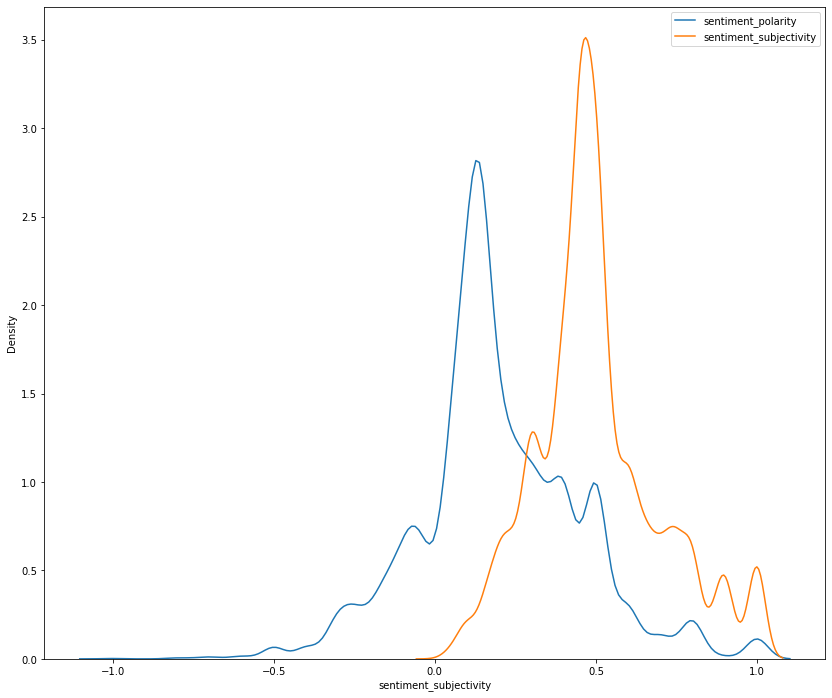

In [249]:
# Distribution of sentiment polarity and subjectivity
plt.figure(figsize = (14, 12))
for col in ['sentiment_polarity', 'sentiment_subjectivity']:
    sns.set_style()
    sns.distplot(tweets_df_sentiment[col], bins = range(-1, 1, 20), kde = True, label = col)
    plt.legend(labels = ['sentiment_polarity', 'sentiment_subjectivity'])
plt.show()

### Sentiment polarity and subjectivity inference

From the summary statistics and the plot, it is clear that more than 40% of the tweets (10th percentile to 50th percentile) have a neutral sentiment polarity. 

Almost 45% of the tweets are very objective. This is certainly correlated since tweets which are objective make it harder to detect a latent sentiment or emotion within the tweet. 

In [201]:
# Discarding the tweets with polarity or subjectivity = 0
tweets_df_sentiment = tweets_df_sentiment[tweets_df_sentiment['sentiment_polarity'] != 0]
tweets_df_sentiment = tweets_df_sentiment[tweets_df_sentiment['sentiment_subjectivity'] != 0]

tweets_df_sentiment.shape

(22186, 4)

In [202]:
tweets_df_sentiment.head(100)

,tweet_author,tweet_text,sentiment_polarity,sentiment_subjectivity
1373902876553048065,1stOncology,nice backs astrazenecas calquence for cll,0.600000,1.000000
1373656782367813635,Toby Eyre,acalabrutinib valuable option pts intolerant ibrutinib further valuable data help decision making cll early view haematologica,0.050000,0.400000
1372941634334232586,Lymphoma Hub,nice has recommended the use acalabrutinib for patients with treatment chronic lymphocytic leukemia find out more here lymsm lymphoma,0.550000,0.750000
1372927482278539265,David Ledger,nice backs astrazeneca calquence for cll,0.600000,1.000000
1372911723305394179,N Wales Cancer Forum,this england for now these decisions usually come wales too more info,0.125000,0.375000
1372888121159868423,European Pharmaceutical Review,astrazeneca calquence acalabrutinib chemotherapy free monotherapy will offered patients with chronic lymphocytic leukaemia oncology drugapprovals pharma healthnews find out more here,0.450000,0.650000
1372866915081797632,Graham Collins,superstar responding the excellent news nice approval acalabrutinib frontline cll for fcr unsuitable patients,0.800000,1.000000
1372825553837944834,CLL Ireland,cll patients all know the drug ibrutinib and the acalabrutinib was approved and now new drug pirtobrutinib making big impact for relapsed patients recent clinicaltrials,0.045455,0.268182
1372788676191608837,Mice Ideas,optimal management high risk cll with acalabrutinib speaker subramanian mumbai speaker group captain harshit khurana pune chair advani mumbai moderator agarwal mumbai link,0.160000,0.540000
1372662881230188555,Farooq A Wandroo,acalabrutinib for all forms cll niceget ready,0.200000,0.500000


In [235]:
# Grouping the tweets by authors and averaging the sentiment polarity and subjectivity values for each author 
author_sentiment = tweets_df_sentiment.groupby('tweet_author', sort = False)[['sentiment_polarity', 'sentiment_subjectivity']].mean()
# Grouping the tweets by authors and joining the tweets written by them to simplify the process
author_tweets = tweets_df_sentiment.groupby(['tweet_author'], sort = False)['tweet_text'].apply(lambda x: "^".join(x)).reset_index()
author_tweets = author_tweets.drop_duplicates()
author_tweets.head()

tweet_author  \
0           1stOncology   
1             Toby Eyre   
2          Lymphoma Hub   
3          David Ledger   
4  N Wales Cancer Forum   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [231]:
author_tweets.head()

index  \
0  1373902876553048065   
1  1373656782367813635   
2  1372941634334232586   
3  1372927482278539265   
4  1372911723305394179   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [236]:
# Most active authors and the number of tweets put out by them
tweets_df_sentiment['tweet_author'].value_counts()[0:100]

Paperbirds_Hematology                            1508
Patient Power                                     733
Kathleen D. Hoffman                               373
Medivizor                                         367
CLL Ireland                                       341
VJHemOnc                                          320
Targeted Oncology                                 305
Lymphoma Hub                                      279
Shelley Webb                                      244
Oncology Tube                                     215
CLLSA                                             209
Patient Empowerment Network                       207
Raul Cordoba, MD, PhD                             199
OncLive.com                                       199
Andrew Schorr                                     195
CLL Society Inc.                                  182
chadi nabhan MD, MBA, FACP                        175
Toby Eyre                                         165
CALQUENCE® (acalabrutinib)  

In [237]:
author_sentiment.head(145)

,sentiment_polarity,sentiment_subjectivity
tweet_author,,
1stOncology,0.130653,0.463256
Toby Eyre,0.244315,0.524934
Lymphoma Hub,0.267231,0.537520
David Ledger,0.138095,0.590476
N Wales Cancer Forum,0.125000,0.375000
European Pharmaceutical Review,0.381197,0.796154
Graham Collins,0.320000,0.648333
CLL Ireland,0.246737,0.532175
Mice Ideas,0.160000,0.540000


In [239]:
# Merging the two grouped datasets with the author name as the merge key
tweets_author = pd.merge(left = author_tweets, right = author_sentiment, on = 'tweet_author')

tweets_author.head()

tweet_author  \
0           1stOncology   
1             Toby Eyre   
2          Lymphoma Hub   
3          David Ledger   
4  N Wales Cancer Forum   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [244]:
# Classifying the tweets above a threshold of 0.2 as positive. Why 0.2? As it is already clear that these rule based sentiment
# polarity computing functions aren't very accurate at gleaning sentiments from natural language, espicially on social media where 
# a lot of tweets could be sarcastic or back-handed comments. Since these tweets are mostly scientific news about cancer drugs, oncologists, 
# covid, the objectivity in these statements would be pretty high. To account for that, 0.2 is chosen as an arbitrary threshold. 
# Given more time and sources, a separate model could be built to accurately glean the sentiments from scientific and objective tweets. 

tweets_author['sentiment_class'] = tweets_author['sentiment_polarity'].apply(lambda x: 'Positive' if x > 0.2 else 'Negative')
tweets_author.head()

tweet_author  \
0           1stOncology   
1             Toby Eyre   
2          Lymphoma Hub   
3          David Ledger   
4  N Wales Cancer Forum   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [245]:
# Checking the number of negative sentiment tweets (tweet collection)
len(tweets_author[tweets_author['sentiment_class'] == 'Negative'])

2911

In [246]:
# Checking the number of unique authors
tweets_author.shape

(5189, 5)

In [275]:
# Dropping the unnecessary columns
entity_sentiment_df = tweets_author.drop(columns = ['sentiment_polarity', 'sentiment_subjectivity'])

In [316]:
# This is where the main action is happening! For every entity extracted from the tweets, for each author, if the author
# has tweeted about the entity, the sentiment of the author's consolidated tweets is taken for the entity. 
# This is a simplistic method which is prone to produce imprecise results but this gets the job done for now. 
for entity in count_entities_frequent.keys():
    entity_sentiment_df[entity] = entity_sentiment_df.apply(lambda x : x['sentiment_class'] if entity in x['tweet_text'] else '-', axis = 1)
    
entity_sentiment_df.head()

tweet_author  \
0           1stOncology   
1             Toby Eyre   
2          Lymphoma Hub   
3          David Ledger   
4  N Wales Cancer Forum   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [317]:
# Checking for Null values, if any
entity_sentiment_df.isnull().sum()

tweet_author                                                0
tweet_text                                                  0
sentiment_class                                             0
acalabrutinib venetoclax                                    0
venetoclax                                                  0
acalabrutinib                                               0
cll                                                         0
lymsm                                                       0
astrazeneca calquence                                       0
england                                                     0
astrazeneca calquence acalabrutinib                         0
fcr                                                         0
acalabrutinib monotherapy                                   0
daily                                                       0
acalabrutinib ibrutinib                                     0
cll leusm                                                   0
calquenc

In [319]:
# Dropping the unnecessary columns
entity_sentiment_df.drop(columns = ['tweet_text', 'sentiment_class'], inplace = True)

In [320]:
entity_sentiment_df.head()

,tweet_author,acalabrutinib venetoclax,venetoclax,acalabrutinib,cll,lymsm,astrazeneca calquence,england,astrazeneca calquence acalabrutinib,fcr,acalabrutinib monotherapy,daily,acalabrutinib ibrutinib,cll leusm,calquence acalabrutinib,ireland,japanese,btki,ibrutinib,newtrip acalabrutinib calquence,ublituximab,astra zeneca,icymi,cll dlbcl,fda,cdin,obinutuzumab,ublituximab ibrutinib,acalabrutinib standard,calquence cll,acalabrutinib calquence,cll sll,acalabrutinib cll,calquence,japan,astrazeneca,ibrutinib cll,abbvie,btk,imbruvica,cll acalabrutinib,european,iii cll,jnj,azn calquence,awesomecapital astrazeneca calquence,today,imbruvica cll,new york,astrazeneca plc,mcl,allosct,lymsm cll,chroni,obinutuzumab chlorambucil,seymour,calquence obinutuzumab,gcib obinutuzumab chlorambucil,zanubrutinib,ibrutinib acalabrutinib,lymphocy,lym,clinicaltrial,oral day,twice day,cll bloodcancerawareness,covid,solidarity,astrazeneca blood cancer drug,all day,night,newtrip,michael wang,leusm,calquence data,chroniclymphocyticleukaemia,ash astrazeneca,calquence beigene brukinsa,immunochemotherapy,mantlecelllymphoma,ash astrazeneca calquence,loxo,orr,rct,hematologists,christmas,leucemia linfoc,ema,paolo ghia,lymphocyt,calquence calavi,astrazeneca cancer drug,haematological,day,days,bruton,pembrolizumab,calavi,australia,jeff sharman,leucemia linfoc tica nica,one,acalabrutinib covid,medicamento,astrazeneca cancer drug calquence,calquence covid,the european commission,europe,remdesivir,haematology,richard furman,american,fup,cns,chroniclymphocyticleukemia cll,leusm lymsm,icmr,leusm cll,cll lymsm,astrazeneca pharma india,india,acalabrutinib btk,two,gilead,astrazeneca pharma,morning,cll cllsm,govt,btk acalabrutinib cll sll,btk acalabrutinib cll,nct,phd,john byrd,september,cll bloodcancerawarenessmonth,jennifer woyach,paolo ghia phd,acalabrutinib cll leusm,woyach,soho,china,acalabrutinib idelalisib,cllsm leusm,endcancer leusm,pbs,cll amp,australian,covid calquence btkinhibitors,bloodcancer,cytokinestorm,idelalisib,journal,openaccess,new clinicaltrial,covidto,astrazeneca acalabrutinib,chmp,coca cola,astra,eha,new article,calquence astrazeneca,acalabrutinibbe,baml,chlorambucil,bendamustine,asco,withindays,biosimilar,monotherapy,idelalisib bendamustine,ehavirtual,lymsm leusm,congress,acalabrutinib bruton,acerta pharma,truxima biosimilar rituximab lenalidomide,first,ibrutinib ibrutinib,house,buena noticia para,prueban con,jco,cll btk,obinutuzmab,acalabrutinib como,javier pinilla ibarz,cancerresearch,forbes,germany,reuters,calquence medicamento,mab,covidin,gcib obinutuzumab,sll,lynparza,zero,acalabrutinib obinutuzumab,acerta,james,nih,cllsm leusm lymsm,netherlands,british,ohio,thatbe,cambridge,tki,the united states,hours,cml,lisocabtagene maraleucel,second,acalabrutinib triplet,iii,venclexta,irish,sharman,great news,cll pts,washington,overman immunother,overman,acalabrutinib mcl,waldenstr macroglobulinemia,multicentre,htn,yrs ago,dlbcl lymsm,macroglobulinemia,oxford,george,lympho,obinutuzumab gazyva,dor,leusm hemeonc,leucemia linfatica cronica,obinutuzumab cll,delp,james gerson,jeff sharman cll,acalabrutinib migliora significativamente tempo,abbvie imbruvica,leusm cllsm,arqule,pfs cll,furman,linfoma mantellare,monthly,orbis,projectorbis,obinutuzumab ibrutinib,cllsm,this weekend,bruce cheson,nhs,yrs,mrd neg,ven,chlorambucil obinutuzumab,aspergillosis,canadian,million,the food and drug administration,weekly,canada,rhhby,the food and drug administration fda,obinutuzumab venetoclax,yesterday,renalcell kidneycancer,chinese,cll cll leusm,pfs,cancernews,annual,jonathon cohen,health canada,nccn,ibrutinib leusm,acalabrutinib breakthrough designation,calquence api,brexit,kerry rogers,nda,barbara eichhorst,kipps,bcell,three,anderson,progressione nei,bloodcancers,the day,ghia,new post,dlbcl,pfs benefit cll,healthcare,bispecific,ibrutinib develoent,gazyva,leusm asco,cll asco,bartlett amp,obinutuzumab woyach,asco data,astrazeneca calquence preps,brian koffman,clinicaltrials,danie

In [321]:
# Converting the pandas dataframe to a csv file 
entity_sentiment_df.to_csv("author_entity_sentiment.csv")